<a href="https://colab.research.google.com/github/Abhishek-D7/Bank-Customer-Churn-Prediction-Project/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
Data = pd.read_csv("D:\Data sets\Classification\Bank Customer Churn Prediction.csv")
Data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
Data.drop('customer_id' , axis = 1 , inplace = True)

In [ ]:
df = Data.copy()

In [ ]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

There is no null values

In [ ]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.drop_duplicates
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df['balance'].value_counts()

balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

In [ ]:
mode_balance  = df['balance'].mean()

In [ ]:
df['balance'] = df['balance'].astype(str)
mean_balance = str(mode_balance)

In [ ]:
df['balance'].dtypes

dtype('O')

In [ ]:
df['balance'] = df['balance'].str.replace('0.0',mean_balance)

In [ ]:
df['balance'] = df['balance'].astype(float)
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,76485.889288,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,699,France,Female,39,1,76485.889288,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,76485.889288,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0
9997,709,France,Female,36,7,76485.889288,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.310000,2,1,0,92888.52,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='country', ylabel='count'>

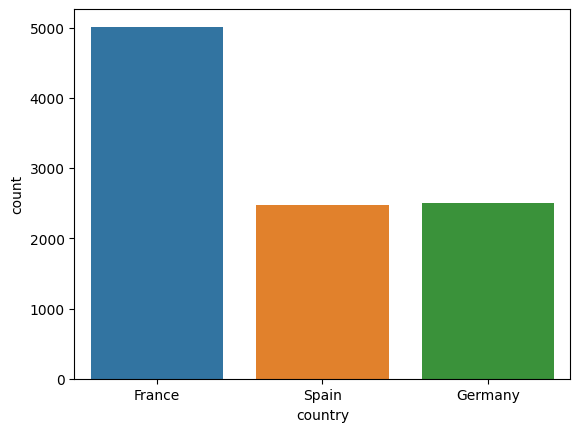

In [ ]:
sns.countplot( data = df , x = 'country' )

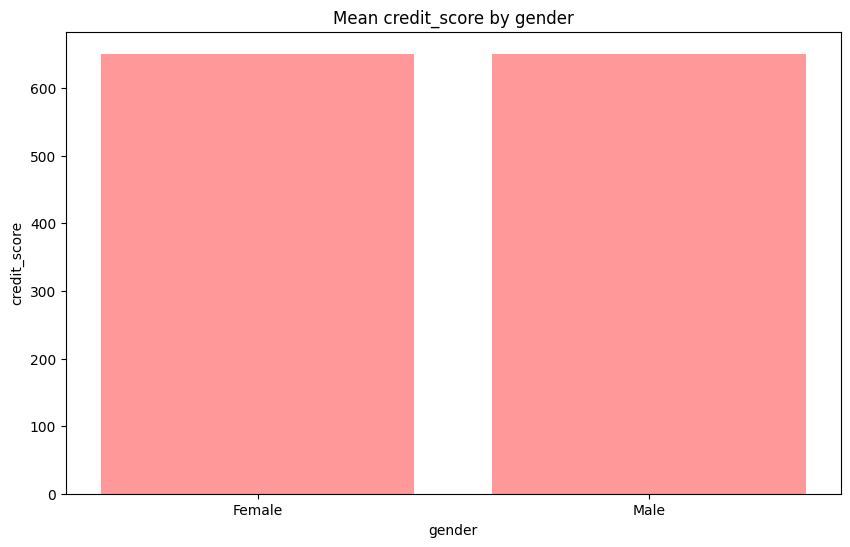

In [ ]:
grouped_data = df.groupby('gender')['credit_score'].mean().reset_index()

plt.figure(figsize=(10, 6))

plt.bar( x = grouped_data['gender'] , height =grouped_data['credit_score'] , color = '#ff9999' )

plt.xlabel('gender')
plt.ylabel('credit_score')
plt.title('Mean credit_score by gender')

plt.show()

In [ ]:
balance = (df['balance'] - df['balance'].min()) / ( df['balance'].max() - df['balance'].min()) *9 + 1
credit_score = (df['credit_score'] - df['credit_score'].min()) / ( df['credit_score'].max() - df['credit_score'].min()) *9 + 1
Salary = (df['estimated_salary'] - df['estimated_salary'].min()) / ( df['estimated_salary'].max() - df['estimated_salary'].min()) *9 + 1
Age = (df['age'] - df['age'].min()) / ( df['age'].max() - df['age'].min()) *9 + 1

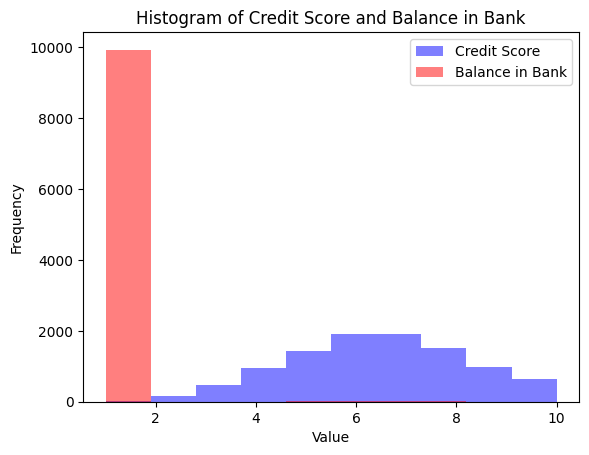

In [ ]:
plt.hist(credit_score, bins=10, alpha=0.5, color='blue', label='Credit Score')
plt.hist(balance, bins=10, alpha=0.5, color='red', label='Balance in Bank')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Credit Score and Balance in Bank')

plt.legend(loc='upper right')

plt.show()

<Axes: xlabel='age', ylabel='estimated_salary'>

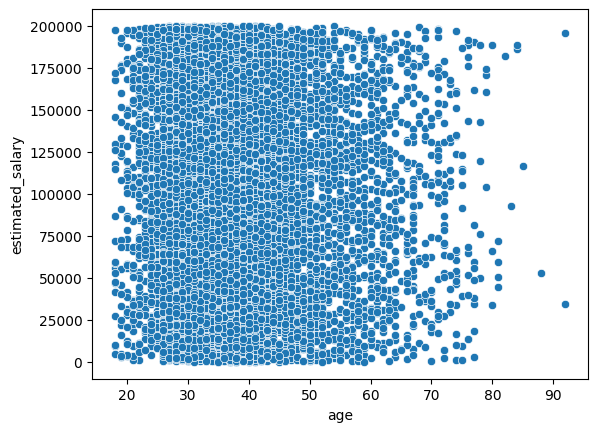

In [ ]:
sns.scatterplot( x = df['age'] , y = df['estimated_salary'] )

<Axes: xlabel='estimated_salary', ylabel='Count'>

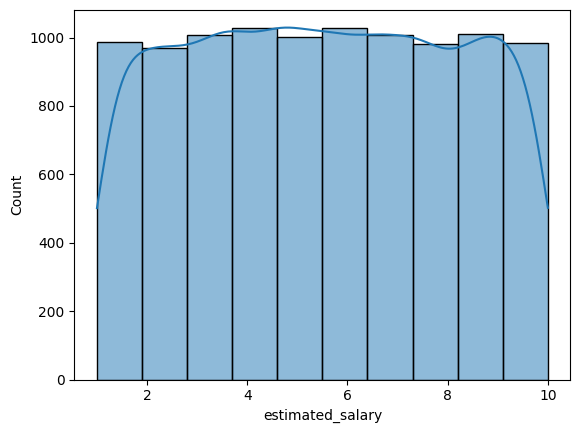

In [ ]:
sns.histplot( x = Salary , bins = 10 , kde = True)

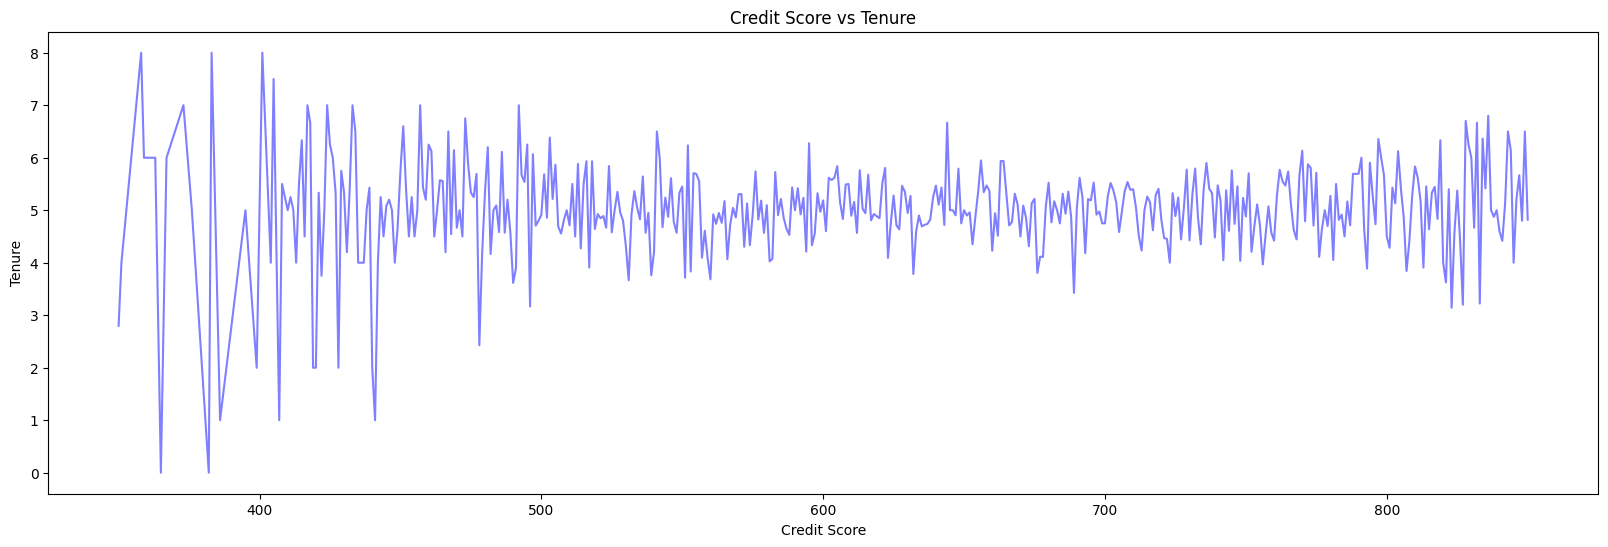

In [ ]:
grouped_data = df.groupby('credit_score')['tenure'].mean().reset_index()
plt.figure(figsize=(20, 6))

plt.plot(grouped_data['credit_score'], grouped_data['tenure'], color='blue', alpha=0.5)

plt.xlabel('Credit Score')
plt.ylabel('Tenure')
plt.title('Credit Score vs Tenure')


plt.show()

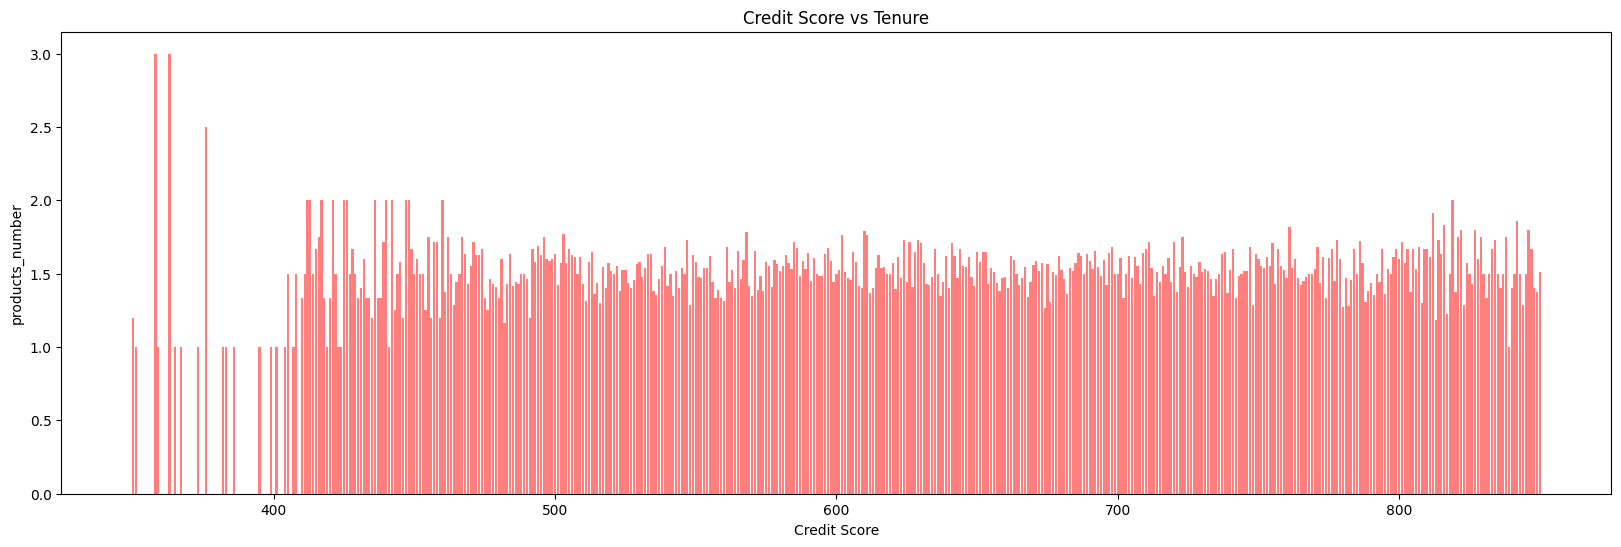

In [ ]:
grouped_data = df.groupby('credit_score')['products_number'].mean().reset_index()
plt.figure(figsize=(20, 6))

plt.bar( grouped_data['credit_score'],grouped_data['products_number'] , color='red', alpha=0.5)

plt.xlabel('Credit Score')
plt.ylabel('products_number')
plt.title('Credit Score vs Tenure')


plt.show()

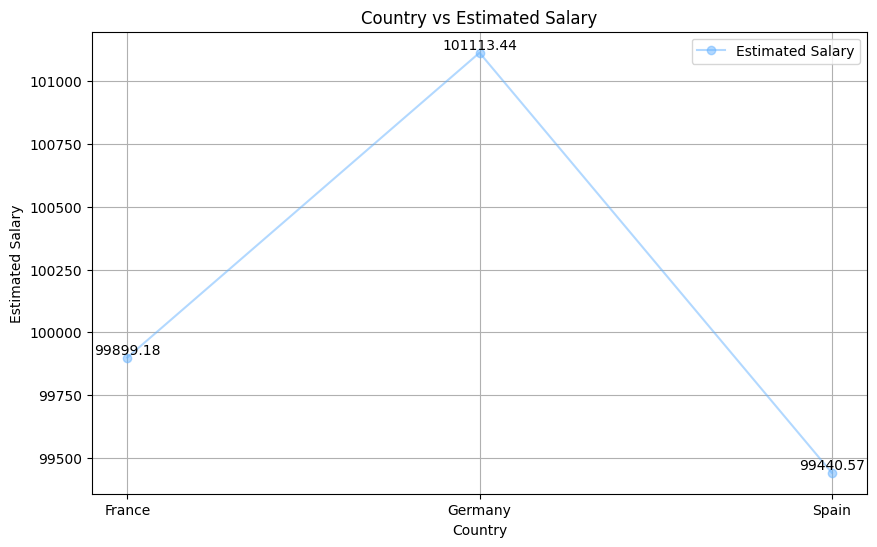

In [ ]:
grouped_data = df.groupby('country')['estimated_salary'].mean().reset_index()
plt.figure(figsize=(10, 6))

# Plot the line
plt.plot(grouped_data['country'], grouped_data['estimated_salary'], color='#66b3ff', alpha=0.5, marker='o', label='Estimated Salary')

# Add data points with values
for i, row in grouped_data.iterrows():
    plt.text(row['country'], row['estimated_salary'], f'{row["estimated_salary"]:.2f}', ha='center', va='bottom')

plt.xlabel('Country')
plt.ylabel('Estimated Salary')
plt.title('Country vs Estimated Salary')
plt.legend()
plt.grid(True)

plt.show()



C:\Users\abhid\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


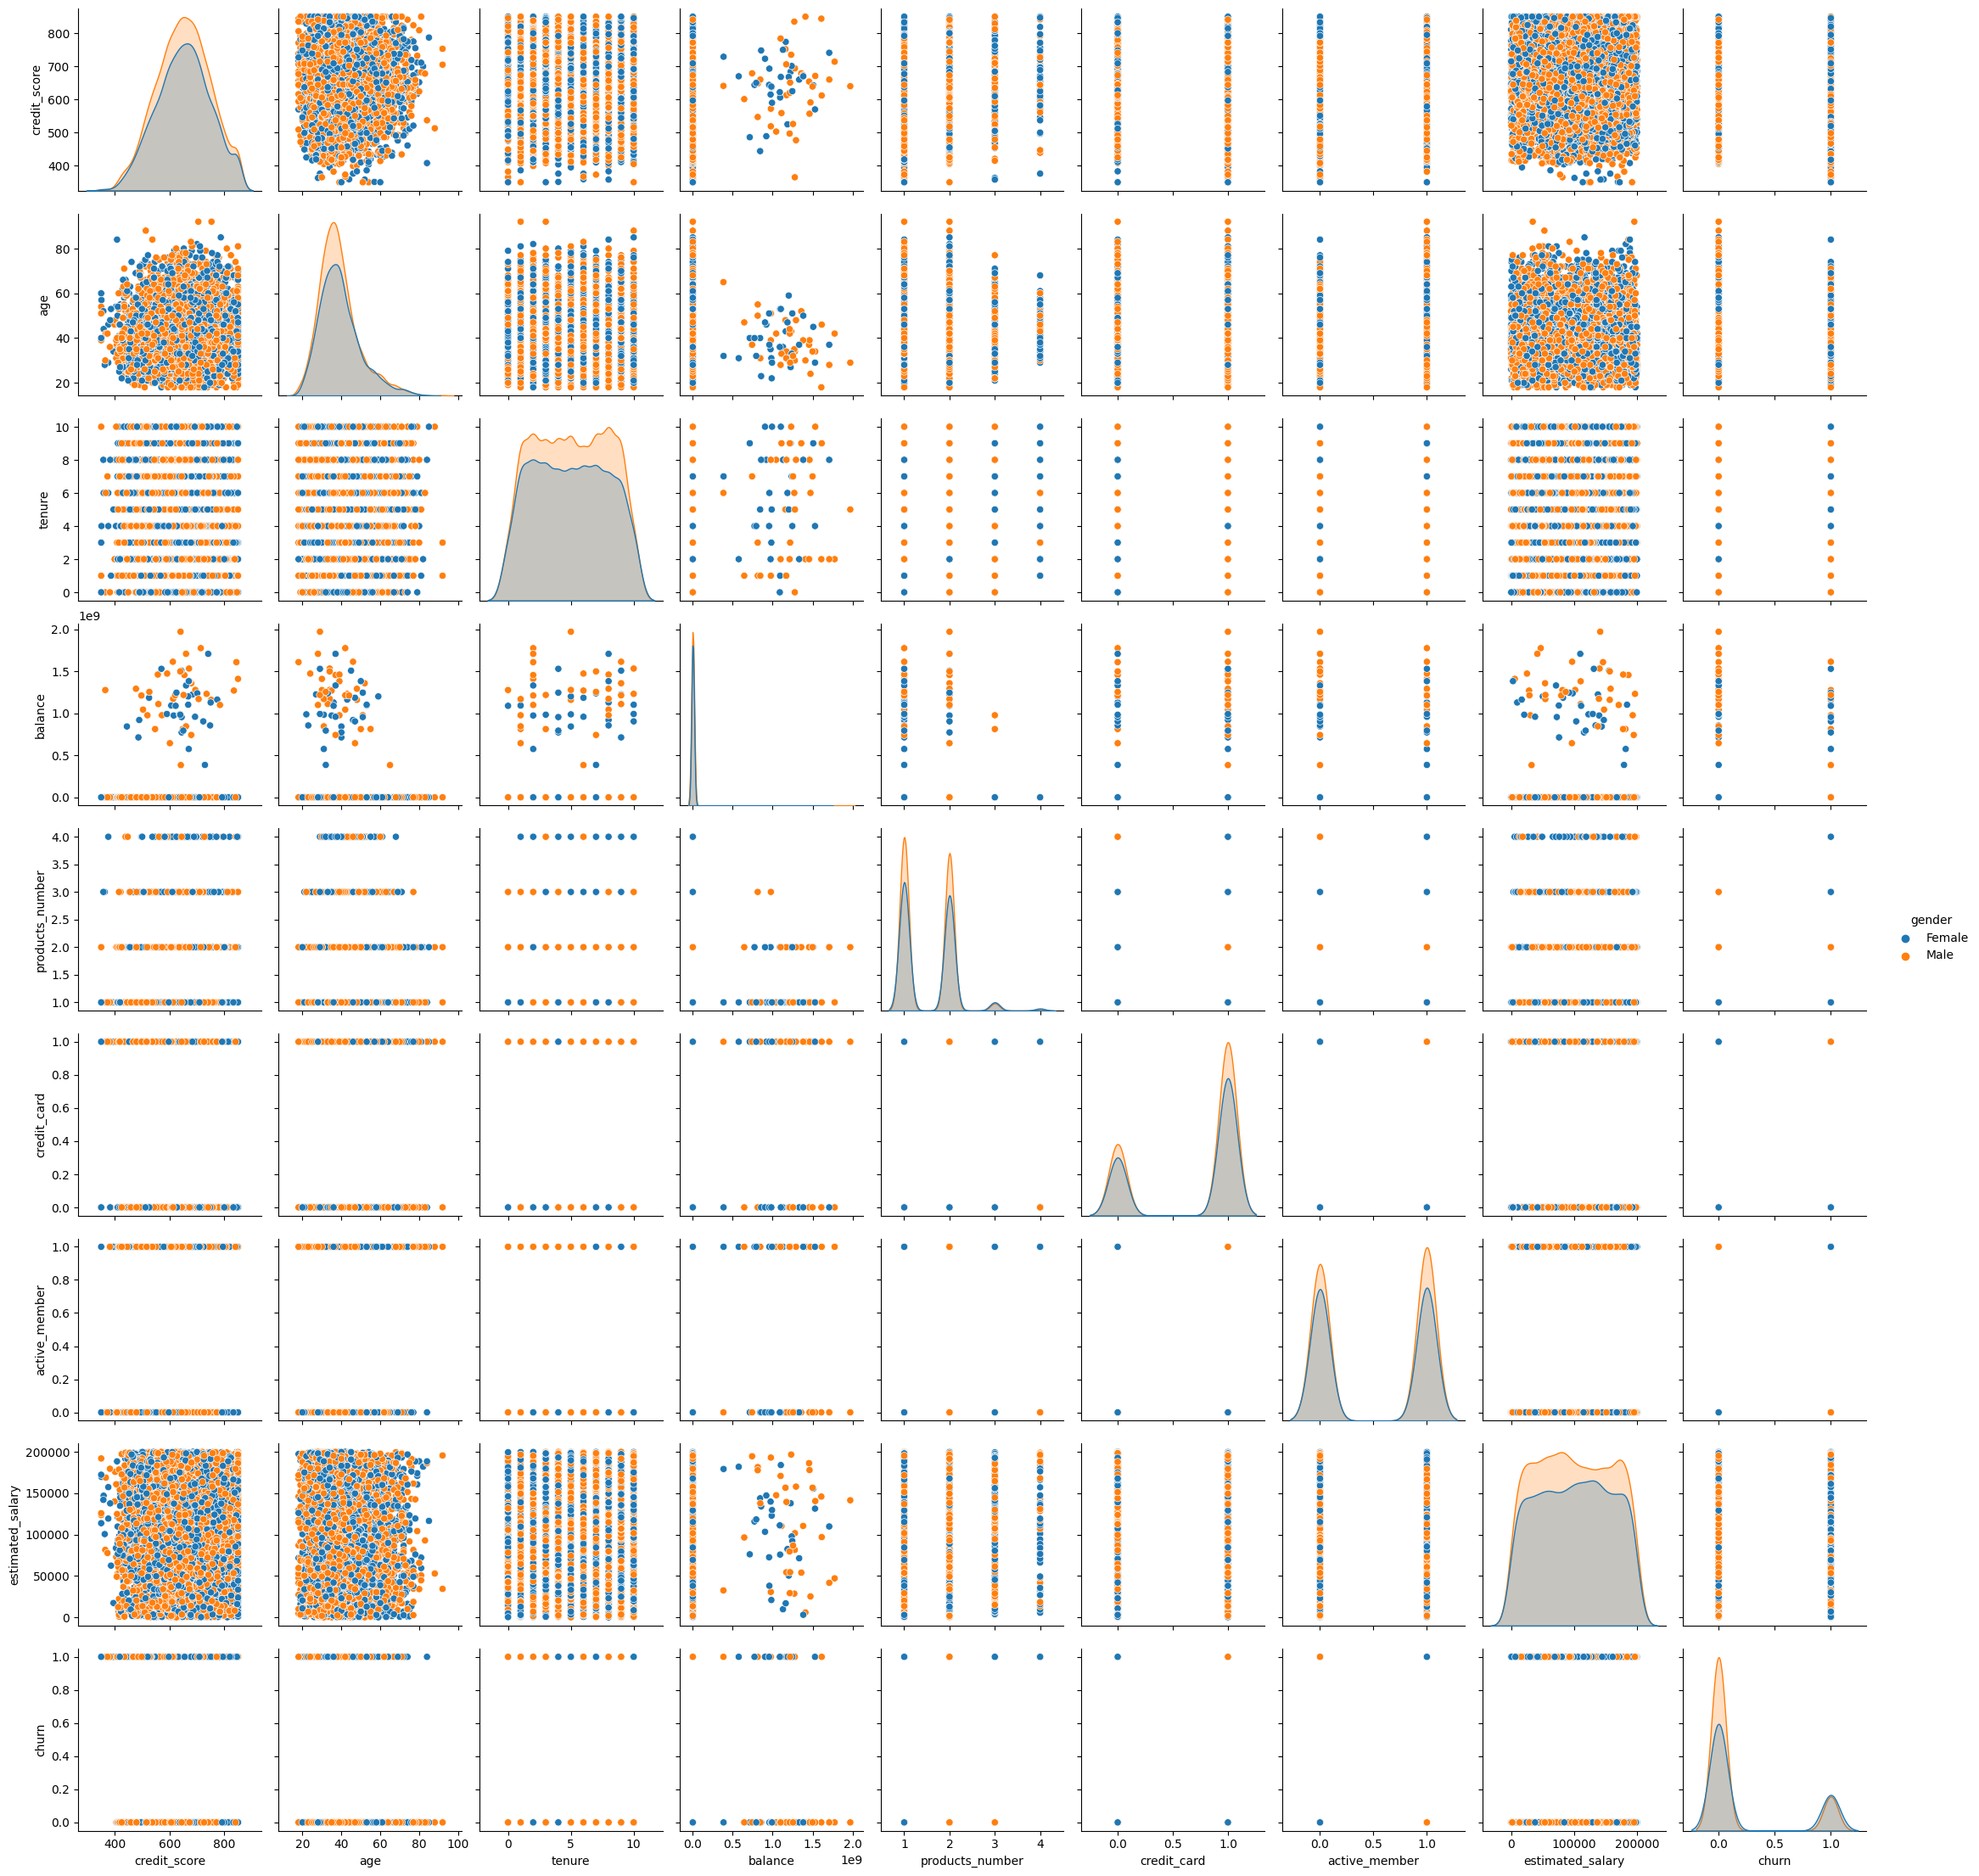

In [ ]:
sns.pairplot(data=df , hue='gender')

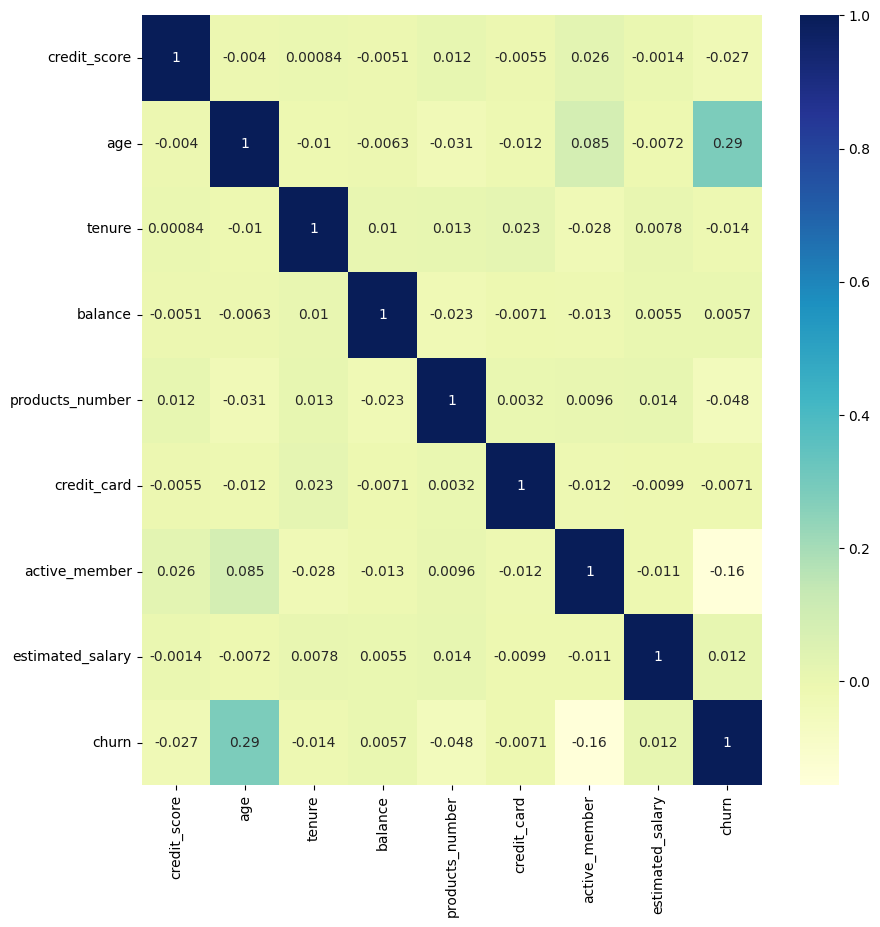

In [ ]:
column_droped = [ 'gender' , 'country']
data = df.drop( columns = column_droped , axis = 1 , inplace = False )
plt.figure(figsize=(10, 10))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
df['balance'] = (df['balance'] - df['balance'].min()) / ( df['balance'].max() - df['balance'].min()) *9 + 1
df['credit_score'] = (df['credit_score'] - df['credit_score'].min()) / ( df['credit_score'].max() - df['credit_score'].min()) *9 + 1
df['estimated_salary'] = (df['estimated_salary'] - df['estimated_salary'].min()) / ( df['estimated_salary'].max() - df['estimated_salary'].min()) *9 + 1
df['age'] = (df['age'] - df['age'].min()) / ( df['age'].max() - df['age'].min()) *9 + 1
df['tenure'] = (df['tenure'] - df['tenure'].min()) / ( df['tenure'].max() - df['tenure'].min()) *9 + 1
df['products_number'] = (df['products_number'] - df['products_number'].min()) / ( df['products_number'].max() - df['products_number'].min()) *9 + 1

In [ ]:
from sklearn.model_selection import train_test_split

drop_column = [ 'churn' , 'country' , 'gender']
X = df.drop(columns = drop_column , axis = 1 )
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.2 , random_state = 16 )

In [ ]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
X_train = X_train.T
y_train = y_train.reshape(1, -1)
X_test = X_test.T
y_test = y_test.reshape(1, -1)

In [ ]:
print('Shape of X_train : ',X_train.shape)
print('Shape of y_train : ',y_train.shape)
print('Shape of X_test : ',X_test.shape)
print('Shape of y_test : ',y_test.shape)

Shape of X_train :  (8, 8000)
Shape of y_train :  (1, 8000)
Shape of X_test :  (8, 2000)
Shape of y_test :  (1, 2000)


In [ ]:
def sigmoid_function(X):
    return 1/(1 + np.exp(-X))

In [ ]:
def model(X , y , lr , iteration):
    m = X_train.shape[1]
    n = X_train.shape[0]

    weights = np.zeros((n,1))
    bias  = 0
    cost_list = []

    for i in range(iteration):
        y_hat = np.dot(weights.T ,X) + bias
        sigmoid = sigmoid_function(y_hat)

        cost = -(1/m)*np.sum( y*np.log(sigmoid) + (1 - y)*np.log(1 - sigmoid))
        dw = (1/m)*(np.dot((sigmoid - y) , X.T))
        db = (1/m)*(np.sum(sigmoid - y))

        weights -= lr*dw.T
        bias -= lr*db

        cost_list.append(cost)
        if (i%(iteration/10) == 0):
            print('cost after ', i ,'iteration is : ', cost)

    return weights , bias, cost_list


In [ ]:
Iteration = 10000
Learning_Rate = 0.01

weights , bias , cost_list = model(X_train , y_train , lr =Learning_Rate , iteration = Iteration )

cost after  0 iteration is :  0.6931471805599454
cost after  1000 iteration is :  0.47247805596410847
cost after  2000 iteration is :  0.4649410664945831
cost after  3000 iteration is :  0.4609864712400254
cost after  4000 iteration is :  0.4587165739478859
cost after  5000 iteration is :  0.4572879225493327
cost after  6000 iteration is :  0.45630206263977596
cost after  7000 iteration is :  0.4555630340084028
cost after  8000 iteration is :  0.4549705390969407
cost after  9000 iteration is :  0.45447107093297817


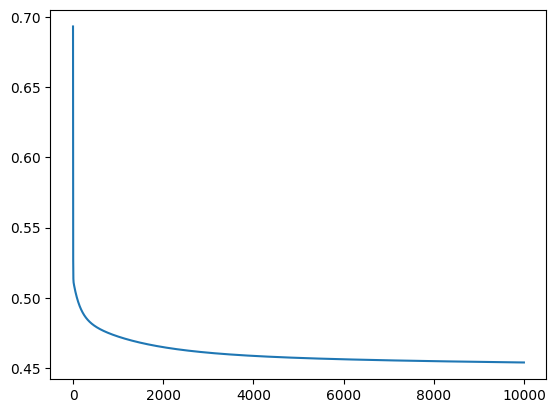

In [ ]:
plt.plot(np.arange(Iteration), cost_list)

In [ ]:
def accuracy( X ,y ,weights , bias):
    y_hat = np.dot(weights.T , X) + bias
    sigmoid = sigmoid_function(y_hat)
    sigmoid = sigmoid > 0.5
    sigmoid = np.array(sigmoid , dtype = 'int64')
    acc = ( 1 - np.sum(np.absolute(sigmoid - y ))/y.shape[1])*100
    print('Accuracy of the Model :' ,acc,'%')

In [ ]:
accuracy = accuracy( X_test , y_test , weights ,bias)

Accuracy of the Model : 81.1 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
X = data.drop(['churn'], axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1607
           1       0.74      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



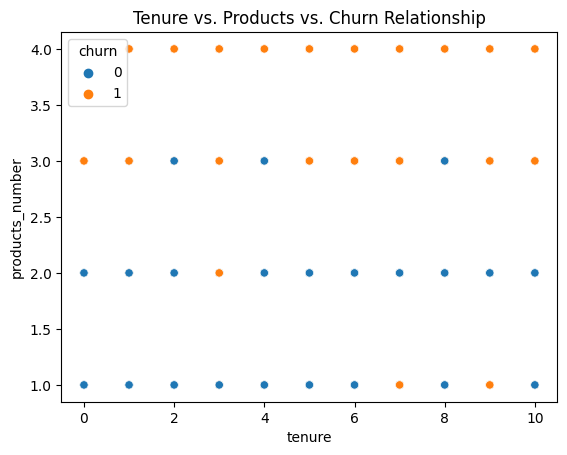

In [ ]:
sns.scatterplot(x='tenure', y='products_number', hue='churn', data=data)
plt.title('Tenure vs. Products vs. Churn Relationship')
plt.show()

Tenure is from how many years he/she is having bank acc in ABC Bank

Products is Number of Product from bank